In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
import time

In [3]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

## 1. Load the data

I use my interested informations about jazz music as a corpus for the data in here.

In [4]:
import spacy
spacy.__version__

'3.5.1'

In [5]:
nlp = spacy.load("en_core_web_sm")

In [6]:
# wiki_King
corpus = ["Martin Luther King Jr. (born Michael King Jr.; January 15, 1929 – April 4, 1968) was an American Baptist minister and activist who became the most visible spokesman and leader in the American civil rights movement from 1955 until his assassination in 1968. King advanced civil rights through nonviolence and civil disobedience, inspired by his Christian beliefs and the nonviolent activism of Mahatma Gandhi. He was the son of early civil rights activist and minister Martin Luther King Sr.King participated in and led marches for blacks' right to vote, desegregation, labor rights, and other basic civil rights.[1] King led the 1955 Montgomery bus boycott and later became the first president of the Southern Christian Leadership Conference (SCLC). As president of the SCLC, he led the unsuccessful Albany Movement in Albany, Georgia, and helped organize some of the nonviolent 1963 protests in Birmingham, Alabama. King helped organize the 1963 March on Washington, where he delivered his famous: I Have a Dream speech on the steps of the Lincoln Memorial."]

In [7]:
corpus_tokenized = []
for i in range(len(corpus)):
    corpus_tokenized.append([str(token) for token in nlp([c for c in corpus][i])])

In [8]:
corpus_tokenized

[['Martin',
  'Luther',
  'King',
  'Jr.',
  '(',
  'born',
  'Michael',
  'King',
  'Jr.',
  ';',
  'January',
  '15',
  ',',
  '1929',
  '–',
  'April',
  '4',
  ',',
  '1968',
  ')',
  'was',
  'an',
  'American',
  'Baptist',
  'minister',
  'and',
  'activist',
  'who',
  'became',
  'the',
  'most',
  'visible',
  'spokesman',
  'and',
  'leader',
  'in',
  'the',
  'American',
  'civil',
  'rights',
  'movement',
  'from',
  '1955',
  'until',
  'his',
  'assassination',
  'in',
  '1968',
  '.',
  'King',
  'advanced',
  'civil',
  'rights',
  'through',
  'nonviolence',
  'and',
  'civil',
  'disobedience',
  ',',
  'inspired',
  'by',
  'his',
  'Christian',
  'beliefs',
  'and',
  'the',
  'nonviolent',
  'activism',
  'of',
  'Mahatma',
  'Gandhi',
  '.',
  'He',
  'was',
  'the',
  'son',
  'of',
  'early',
  'civil',
  'rights',
  'activist',
  'and',
  'minister',
  'Martin',
  'Luther',
  'King',
  'Sr',
  '.',
  'King',
  'participated',
  'in',
  'and',
  'led',
  'mar

In [9]:
#2. numericalize

#2.1 get all the unique words
#we want to flatten this (basically merge all list)
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))  
#vocabs is a term defining all unique words your system know

In [10]:
#2.2 assign id to all these vocabs
word2index = {v: idx for idx, v in enumerate(vocabs)}

In [11]:
word2index['March']

58

In [12]:
word2index['Washington']

101

In [13]:
#add <UNK>, which is a very normal token exists in the world
vocabs.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything

In [14]:
#now we have a way to know what is the id of <UNK>
word2index['<UNK>'] = 0  #I set <UNK> as 0

In [15]:
#create index2word dictionary 
index2word = {v:k for k, v in word2index.items()}

index2word

{0: '<UNK>',
 1: 'most',
 2: 'unsuccessful',
 3: 'visible',
 4: ']',
 5: 'where',
 6: ':',
 7: 'who',
 8: 'early',
 9: 'helped',
 10: 'leader',
 11: 'an',
 12: 'became',
 13: 'he',
 14: 'steps',
 15: 'disobedience',
 16: ';',
 17: 'until',
 18: 'Leadership',
 19: 'Memorial',
 20: 'civil',
 21: 'Gandhi',
 22: 'in',
 23: 'Lincoln',
 24: 'and',
 25: 'activism',
 26: 'Luther',
 27: 'Martin',
 28: 'Have',
 29: 'Dream',
 30: 'protests',
 31: '.',
 32: 'vote',
 33: 'led',
 34: "'",
 35: 'movement',
 36: 'He',
 37: 'later',
 38: 'speech',
 39: 'Sr',
 40: 'rights.[1',
 41: 'of',
 42: '1963',
 43: 'was',
 44: 'Baptist',
 45: ',',
 46: 'the',
 47: 'Conference',
 48: 'Alabama',
 49: 'for',
 50: 'blacks',
 51: 'president',
 52: 'labor',
 53: 'other',
 54: 'Michael',
 55: 'his',
 56: 'to',
 57: 'American',
 58: 'March',
 59: 'Georgia',
 60: 'on',
 61: 'a',
 62: 'inspired',
 63: 'through',
 64: '15',
 65: 'I',
 66: 'April',
 67: 'famous',
 68: 'nonviolence',
 69: 'Movement',
 70: 'minister',
 71: ')'

In [16]:
vocabs

['marches',
 'most',
 'unsuccessful',
 'visible',
 ']',
 'where',
 ':',
 'who',
 'early',
 'helped',
 'leader',
 'an',
 'became',
 'he',
 'steps',
 'disobedience',
 ';',
 'until',
 'Leadership',
 'Memorial',
 'civil',
 'Gandhi',
 'in',
 'Lincoln',
 'and',
 'activism',
 'Luther',
 'Martin',
 'Have',
 'Dream',
 'protests',
 '.',
 'vote',
 'led',
 "'",
 'movement',
 'He',
 'later',
 'speech',
 'Sr',
 'rights.[1',
 'of',
 '1963',
 'was',
 'Baptist',
 ',',
 'the',
 'Conference',
 'Alabama',
 'for',
 'blacks',
 'president',
 'labor',
 'other',
 'Michael',
 'his',
 'to',
 'American',
 'March',
 'Georgia',
 'on',
 'a',
 'inspired',
 'through',
 '15',
 'I',
 'April',
 'famous',
 'nonviolence',
 'Movement',
 'minister',
 ')',
 'beliefs',
 'right',
 'January',
 'by',
 'born',
 'Albany',
 'King',
 '1968',
 'Mahatma',
 'Christian',
 'bus',
 'activist',
 'participated',
 'advanced',
 'first',
 '1955',
 'son',
 'Southern',
 'SCLC',
 'boycott',
 'As',
 'spokesman',
 '(',
 '1929',
 '–',
 'assassination

## Prepare the data

In [17]:

#use window_size = 2 as the assignment's instruction.

skipgrams = []

#for each corpus
for sent in corpus_tokenized:
    for i in range(2, len(sent)-2): #start from 2 to second last
        center_word = sent[i]
        outside_words = [sent[i-2], sent[i+2]]  #window_size = 2
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams[:40]

[['King', 'Martin'],
 ['King', '('],
 ['Jr.', 'Luther'],
 ['Jr.', 'born'],
 ['(', 'King'],
 ['(', 'Michael'],
 ['born', 'Jr.'],
 ['born', 'King'],
 ['Michael', '('],
 ['Michael', 'Jr.'],
 ['King', 'born'],
 ['King', ';'],
 ['Jr.', 'Michael'],
 ['Jr.', 'January'],
 [';', 'King'],
 [';', '15'],
 ['January', 'Jr.'],
 ['January', ','],
 ['15', ';'],
 ['15', '1929'],
 [',', 'January'],
 [',', '–'],
 ['1929', '15'],
 ['1929', 'April'],
 ['–', ','],
 ['–', '4'],
 ['April', '1929'],
 ['April', ','],
 ['4', '–'],
 ['4', '1968'],
 [',', 'April'],
 [',', ')'],
 ['1968', '4'],
 ['1968', 'was'],
 [')', ','],
 [')', 'an'],
 ['was', '1968'],
 ['was', 'American'],
 ['an', ')'],
 ['an', 'Baptist']]

In [18]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]

def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent 
        for i in range(2, len(sent) - 2): #start from 2 to the third last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-2]], word2index[sent[i+2]]]  #window_size = 2
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [19]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[45],
       [26],
       [46],
       [45],
       [15],
       [31],
       [45],
       [22],
       [90],
       [63]])


## Unigram distribution

In [20]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
# word_count # Showing word count

In [21]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

194

In [22]:
z = 0.001  #scaling up low frequency terms
unigram_table = []

# create loop for the P(w) formula
for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** (3/4)
    uw_alpha_dividebyz = int(uw_alpha / z)
    unigram_table.extend([v] * uw_alpha_dividebyz)
    
# Counter(unigram_table)

## 4. Negative sampling

In [23]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [24]:
import random

def negative_sampling(targets, unigram_table, k):
    
    batch_size = targets.shape[0]
    neg_samples = []
    
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)

In [25]:
batch_size = 2
input_batch, label_batch = random_batch(batch_size, corpus_tokenized)

input_batch, label_batch

(array([[79],
        [70]]),
 array([[97],
        [26]]))

In [26]:
# Convert to Tensor

input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [27]:
num_neg = 5 
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [28]:
neg_samples.shape # shape is (batch_size, num_neg)

torch.Size([2, 5])

## 5. Model

In [29]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, centre_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        center_embbed  = self.embedding_center_word(centre_words)    #(batch_size, 1, emb_size)
        outside_embbed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embbed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embbed.bmm(center_embbed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embbed.bmm(center_embbed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  
#scalar, loss should be scalar, to call backward()

In [30]:
input, label = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [31]:
emb_size = 20 
voc_size = len(vocabs)
model = SkipgramNeg(voc_size, emb_size)

In [32]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [33]:
neg_tensor

tensor([[19, 38, 68, 73, 41],
        [39, 26, 41, 74,  9]])

In [34]:
input_tensor.shape, label_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [35]:
loss = model(input_tensor, label_tensor, neg_tensor)
loss

tensor(9.0118, grad_fn=<NegBackward0>)

## 6. Training

In [36]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 20
model      = SkipgramNeg(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [37]:
num_epochs = 4000
start0 = time.time()

for epoch in range(num_epochs):

    #get random batch
    start = time.time()
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    neg_batch   = negative_sampling(label_batch, unigram_table, 5)    
    
    #loss = model
    loss = model(input_batch, label_batch, neg_batch)
    end = time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: {epoch_mins}mins {epoch_secs}secs")
end0 = time.time()
skipmins, skipsecs = epoch_time(start0, end0)
print(f"Process Time: {skipmins}mins {skipsecs}secs")

Epoch 1000 | Loss: 0.857514 | Time: 0mins 0secs
Epoch 2000 | Loss: 2.118812 | Time: 0mins 0secs
Epoch 3000 | Loss: 37.143444 | Time: 0mins 0secs
Epoch 4000 | Loss: 3.105965 | Time: 0mins 0secs
Process Time: 0mins 6secs


## 7. Plot the embeddings

In [38]:
king = torch.LongTensor([word2index['King']])
king

tensor([78])

In [39]:
president = torch.LongTensor([word2index['president']])
president

tensor([51])

In [40]:
king_center_embbed = model.embedding_center_word(king)
king_outside_embbed = model.embedding_outside_word(king)
king_embbed = (king_center_embbed + king_outside_embbed) / 2
king_embbed

tensor([[ 0.7344,  1.3435,  2.8556, -1.8368, -0.3663, -1.5712, -1.3355,  0.8111,
          0.2515,  1.5568,  0.1334, -0.4816,  2.2125, -1.1088,  2.1707,  2.8774,
          0.8719, -1.3954, -1.2681,  1.0637]], grad_fn=<DivBackward0>)

In [41]:
def get_embbed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embbed  = model.embedding_center_word(word)
    outside_embbed = model.embedding_outside_word(word)
    
    embbed = (center_embbed + outside_embbed) / 2
    
    return  embbed[0][0].item(), embbed[0][1].item()

In [42]:
king_1 = get_embbed('King')
print(king_1)
president_1 = get_embbed('president')
print(president_1)

(0.734352171421051, 1.3434690237045288)
(-1.4363582134246826, -0.6898972988128662)


In [43]:
leader_1 = get_embbed('leader')
print(leader_1)

(0.1297507882118225, 1.1365818977355957)


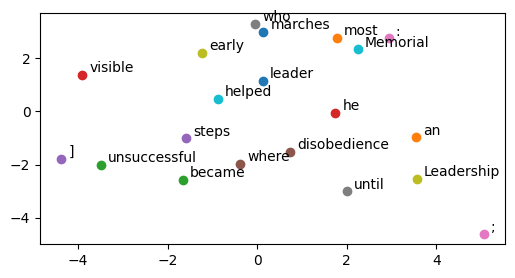

In [44]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embbed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Try CBOW

In [45]:
#delete duplicate word define as vocabs, also include unknow as <UNK>.
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))
vocabs.append('<UNK>') # to let '<UNK>' become the last.

In [46]:
word2index = {v: idx+1 for idx, v in enumerate(vocabs)} #plus one to shift value in word index to assign <UNK>'s value to 0 without duplication with others.
word2index['<UNK>'] = 0

#Let check word to index's value
word2index["King"]

79

In [47]:
# create index to word
index2word = {v:k for k, v in word2index.items()}

index2word[68]

'famous'

## Prepare the data

In [48]:
cbow = []

#for each corpus
for sent in corpus_tokenized:
    #for each sent 
    for i in range(2, len(sent) - 2): # start from 1 to second last but we use window size of 2, then first centre word should be at index 2
        center_word = sent[i]
        ooutside_words = [sent[i-2], sent[i+2]]  #window_size = 2
        for o in outside_words:
            cbow.append([center_word, o])

cbow[:30]

[['King', 'of'],
 ['King', '.'],
 ['Jr.', 'of'],
 ['Jr.', '.'],
 ['(', 'of'],
 ['(', '.'],
 ['born', 'of'],
 ['born', '.'],
 ['Michael', 'of'],
 ['Michael', '.'],
 ['King', 'of'],
 ['King', '.'],
 ['Jr.', 'of'],
 ['Jr.', '.'],
 [';', 'of'],
 [';', '.'],
 ['January', 'of'],
 ['January', '.'],
 ['15', 'of'],
 ['15', '.'],
 [',', 'of'],
 [',', '.'],
 ['1929', 'of'],
 ['1929', '.'],
 ['–', 'of'],
 ['–', '.'],
 ['April', 'of'],
 ['April', '.'],
 ['4', 'of'],
 ['4', '.']]

In [49]:
def random_batch(batch_size, corpus):
    
    cbow = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent 
        for i in range(2, len(sent) - 2): #start from 2 to the third last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-2]], word2index[sent[i+2]]]  #window_size = 2
            for o in outside_words:
                cbow.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([cbow[index][0]])  
        random_labels.append([cbow[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [50]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[96],
       [23],
       [95],
       [33],
       [88],
       [26],
       [71],
       [27],
       [40],
       [47]])


## Unigram distribution

In [51]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))

In [52]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

194

In [53]:
z = 0.001  #scaling up low frequency terms
unigram_table = []

# create loop for the P(w) formula
for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** (3/4)
    uw_alpha_dividebyz = int(uw_alpha / z)
    unigram_table.extend([v] * uw_alpha_dividebyz)

## Negative sampling

In [54]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [55]:
import random

def negative_sampling(targets, unigram_table, k):
    
    batch_size = targets.shape[0]
    neg_samples = []
    
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)

Skipgram and CBOW have different prediction methods
then it has to flip labels and inputs for CBOW.

In [56]:
batch_size = 2
label_batch, input_batch = random_batch(batch_size, corpus_tokenized)

input_batch, label_batch

(array([[81],
        [46]]),
 array([[26],
        [75]]))

In [57]:
# Convert to Tensor

input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [58]:
num_neg = 5  # same as the first part
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [59]:
neg_samples.shape # shape is (batch_size, num_neg)

torch.Size([2, 5])

## Model

In [60]:
class cbow(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(cbow, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, center_words, outside_words, negative_words):
        
        center_embed  = self.embedding_center_word(center_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [61]:
label, input = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [62]:
emb_size = 20
voc_size = len(vocabs)
model = cbow(voc_size, emb_size)

In [63]:
emb_size

20

In [64]:
voc_size

112

In [65]:
model

cbow(
  (embedding_center_word): Embedding(112, 20)
  (embedding_outside_word): Embedding(112, 20)
  (logsigmoid): LogSigmoid()
)

In [66]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [67]:
input_tensor.shape, label_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [68]:
loss = model(input_tensor, label_tensor, neg_tensor)
loss

tensor(3.7207, grad_fn=<NegBackward0>)

## Training

In [69]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 20
model      = cbow(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [70]:
num_epochs = 4000
start0 = time.time()

for epoch in range(num_epochs):
    start = time.time()

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    neg_batch   = negative_sampling(label_batch, unigram_table, 5)    
    
    #loss = model
    loss = model(input_batch, label_batch, neg_batch)
    end = time.time()
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f}")
end0 = time.time()
negmins, negsecs = epoch_time(start0, end0)
print(f"Process Time: {negmins}mins {negsecs}secs")

Epoch 1000 | Loss: 0.015671
Epoch 2000 | Loss: 3.710151
Epoch 3000 | Loss: 17.852722
Epoch 4000 | Loss: 0.000000
Process Time: 0mins 4secs


## Plot the embeddings

In [71]:
king = torch.LongTensor([word2index['King']])
king

tensor([79])

In [72]:
king_center_embed = model.embedding_center_word(king)
king_outside_embed = model.embedding_outside_word(king)

king_embed = (king_center_embed + king_outside_embed) / 2
king_embed

tensor([[-2.0001, -2.5732,  0.7129, -0.8444,  4.1257,  1.1380, -2.3126, -2.2041,
          1.5149, -0.3793,  2.4533,  0.3230,  1.4032, -0.2519, -0.5588, -0.9905,
         -0.2676, -1.5087,  0.9739,  1.4016]], grad_fn=<DivBackward0>)

In [73]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [74]:
neg_king = get_embed('King')
neg_leader = get_embed('leader')
neg_president = get_embed('president')
print(neg_king)
print(neg_leader)
print(neg_president)

(-2.0001373291015625, -2.573195457458496)
(1.2795846462249756, -0.223901629447937)
(-1.4619696140289307, -2.53597354888916)


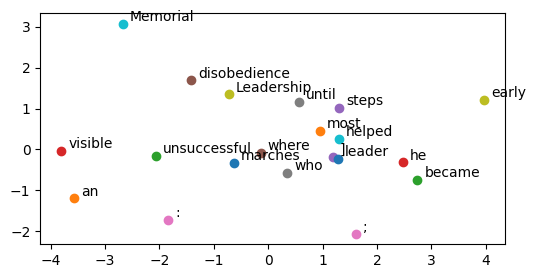

In [75]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Try Normal Skipgram

In [76]:
#delete duplicate word define as vocabs, also include unknow as <UNK>.
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))
vocabs.append('<UNK>') # to let '<UNK>' become the last.
word2index = {v: idx+1 for idx, v in enumerate(vocabs)} #plus one to shift value in word index to assign <UNK>'s value to 0 without duplication with others.
word2index['<UNK>'] = 0

#Let check word to index's value
word2index["King"]

79

In [77]:
# Create index to word
index2word = {v:k for k, v in word2index.items()}

index2word[80]

'1968'

In [78]:
skipgrams = []

#for each corpus
for sent in corpus_tokenized:
    
    for i in range(2, len(sent) - 2): # start from 1 to second last but we use window size of 2, then first centre word should be at index 2
        center_word = sent[i]
        outside_words = np.ravel([sent[i - 2:i],sent[i+1: i + 3]])  # window_size = 2
        for o in outside_words:
            skipgrams.append([center_word, o])

In [79]:
skipgrams[:40]

[['King', 'Martin'],
 ['King', 'Luther'],
 ['King', 'Jr.'],
 ['King', '('],
 ['Jr.', 'Luther'],
 ['Jr.', 'King'],
 ['Jr.', '('],
 ['Jr.', 'born'],
 ['(', 'King'],
 ['(', 'Jr.'],
 ['(', 'born'],
 ['(', 'Michael'],
 ['born', 'Jr.'],
 ['born', '('],
 ['born', 'Michael'],
 ['born', 'King'],
 ['Michael', '('],
 ['Michael', 'born'],
 ['Michael', 'King'],
 ['Michael', 'Jr.'],
 ['King', 'born'],
 ['King', 'Michael'],
 ['King', 'Jr.'],
 ['King', ';'],
 ['Jr.', 'Michael'],
 ['Jr.', 'King'],
 ['Jr.', ';'],
 ['Jr.', 'January'],
 [';', 'King'],
 [';', 'Jr.'],
 [';', 'January'],
 [';', '15'],
 ['January', 'Jr.'],
 ['January', ';'],
 ['January', '15'],
 ['January', ','],
 ['15', ';'],
 ['15', 'January'],
 ['15', ','],
 ['15', '1929']]

In [80]:
def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent 
        for i in range(2, len(sent) - 2): #start from 2 to the third last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-2]], word2index[sent[i+2]]]  #window_size = 2
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [81]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [82]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[12],
       [75],
       [29],
       [25],
       [25],
       [45],
       [47],
       [ 9],
       [36],
       [56]])


## Model

In [83]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 112])

In [84]:
input, label = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [85]:
emb_size = 20
voc_size = len(vocabs)
model = Skipgram(voc_size, emb_size)

In [86]:
input_tensor.shape

torch.Size([2, 1])

In [87]:
label_tensor.shape

torch.Size([2, 1])

In [88]:
loss = model(input_tensor, label_tensor, all_vocabs)
loss

tensor(12.7076, grad_fn=<NegBackward0>)

## Training

In [89]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 20
model      = Skipgram(voc_size, emb_size)
optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [90]:
num_epochs = 4000
start0 = time.time()

#for epoch
for epoch in range(num_epochs):
    start = time.time()
    
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f}")

end0 = time.time()
mins, secs = epoch_time(start0, end0)
print(f"Process Time: {mins}mins {secs}secs")

Epoch 1000 | Loss: 8.593601
Epoch 2000 | Loss: 8.013803
Epoch 3000 | Loss: 2.194254
Epoch 4000 | Loss: nan
Process Time: 0mins 5secs


## Plot the embeddings

In [91]:
king = torch.LongTensor([word2index['King']])
king

tensor([79])

In [92]:
king_center_embed = model.embedding_center_word(king)
king_outside_embed = model.embedding_outside_word(king)

king_embed = (king_center_embed + king_outside_embed) / 2
king_embed

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<DivBackward0>)

In [93]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

##### Something went wrong, normal version of skipgram did not work

In [94]:
# print(get_embed('president'))

In [95]:
# plt.figure(figsize=(6,3))
# for i, word in enumerate(vocabs[:20]): #loop each unique vocab
#     x, y = get_embed(word)
#     plt.scatter(x, y)
#     plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
# plt.show()

## Comparing

In [96]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

In [97]:
print(f"king vs. president: ",        cos_sim(king_1, president_1))
print(f"king vs. leader: ",       cos_sim(king_1, leader_1))
print(f"president vs. leader: ",     cos_sim(president_1, leader_1))
print(f'Total time use in skipgram {skipmins} miniute(s) {skipsecs} second')

king vs. president:  -0.8122551333398507
king vs. leader:  0.9262079330583262
president vs. leader:  -0.5324045415963159
Total time use in skipgram 0 miniute(s) 6 second


In [98]:
print(f"king vs. president: ",        cos_sim(neg_king, neg_president))
print(f"king vs. leader: ",       cos_sim(neg_king, neg_leader))
print(f"president vs. leader: ",     cos_sim(neg_president, neg_leader))
print(f'Total time use in negSampling {negmins} miniute(s) {negsecs} second')

king vs. president:  0.990522185710691
king vs. leader:  -0.4684339603387597
president vs. leader:  -0.3426432099594041
Total time use in negSampling 0 miniute(s) 4 second
